### Employee Earnings - Decision Tree

In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# view all columns in the dataframe 
pd.set_option('display.max_columns', None)

In [2]:
# load the dataset 
earn = pd.read_csv(r'C:\Users\OJO Timilehin\Desktop\dataset/batch2_jobID_00B80TR.csv')
earn.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [3]:
earn.shape

(1000000, 8)

In [4]:
earn.milesFromMetropolis.unique()

array([83, 73, 38, 17, 16, 31, 24, 70, 54, 68, 30, 79, 29, 26, 81,  8, 91,
       43, 66, 99, 96, 62, 69, 63, 40,  6, 23,  9,  2, 32, 78, 14, 58, 35,
       93, 82, 87, 76, 22, 44, 72,  4, 25, 36,  5, 71, 65, 53, 13, 33, 55,
       61, 98, 59, 15, 75, 56, 11, 12, 34, 21, 52, 46, 48, 97, 28, 94, 41,
       74, 60, 95, 80, 89, 10, 50, 49,  3, 88, 47, 51, 18, 92, 42, 39, 67,
       84, 86,  0, 19, 20, 57, 37, 64,  1, 27, 77, 90, 45, 85,  7],
      dtype=int64)

In [5]:
# null values
for feature in earn.columns: 
    print(feature, earn[feature].nunique(),'Unique values, ', earn[feature].isnull().sum(), 'NaN values,', earn[feature].dtypes)

companyId 63 Unique values,  0 NaN values, object
jobType 8 Unique values,  0 NaN values, object
degree 5 Unique values,  0 NaN values, object
major 9 Unique values,  0 NaN values, object
industry 7 Unique values,  0 NaN values, object
yearsExperience 25 Unique values,  0 NaN values, int64
milesFromMetropolis 100 Unique values,  0 NaN values, int64
salary 280 Unique values,  0 NaN values, int64


In [6]:
df = earn.sample(frac = 0.02, random_state=42) 
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
987231,COMP41,CFO,HIGH_SCHOOL,NONE,WEB,12,21,174
79954,COMP44,JANITOR,HIGH_SCHOOL,NONE,HEALTH,15,64,58
567130,COMP44,CTO,HIGH_SCHOOL,NONE,OIL,21,4,168
500891,COMP9,CTO,HIGH_SCHOOL,NONE,FINANCE,5,89,85
55399,COMP3,JUNIOR,DOCTORAL,BIOLOGY,WEB,23,64,145


In [7]:
df.shape

(20000, 8)

## Exploratory Data Analysis 

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


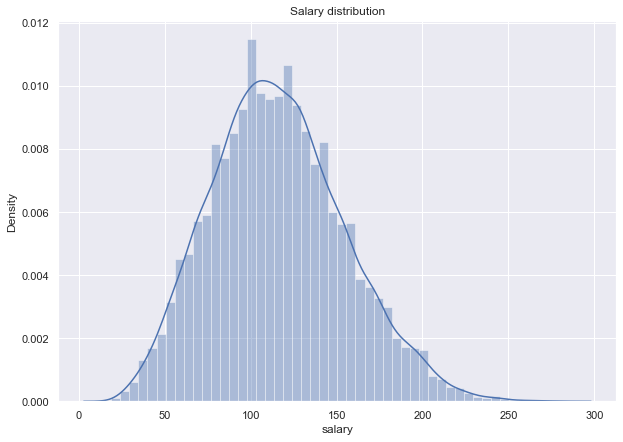

In [8]:
# taret variable 
plt.figure(figsize=(10, 7))
sns.distplot(df.salary)
plt.title('Salary distribution')
plt.show()

- The salary follow a normal distribution.

In [9]:
# Categorical Varaiable 
cat_var = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_var

['companyId', 'jobType', 'degree', 'major', 'industry']

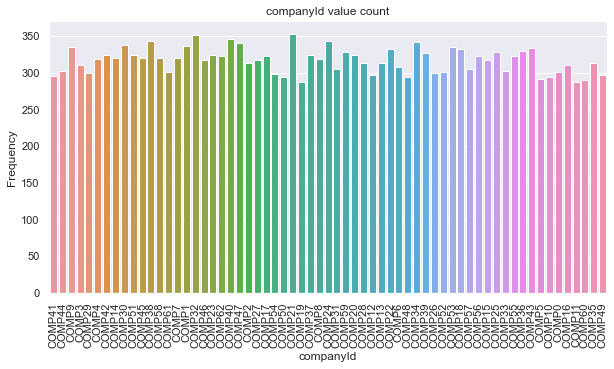

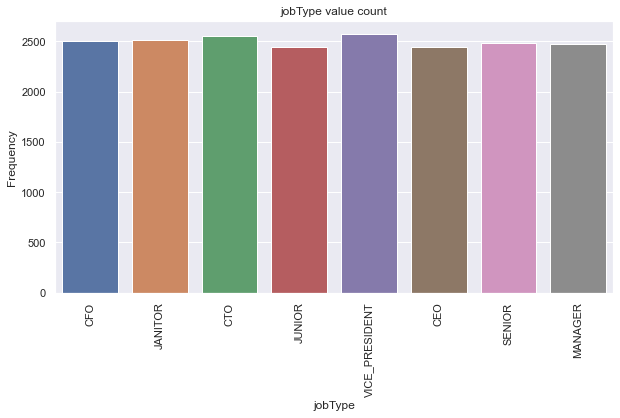

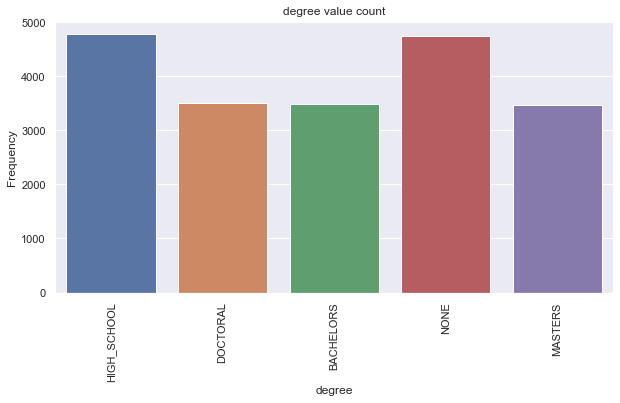

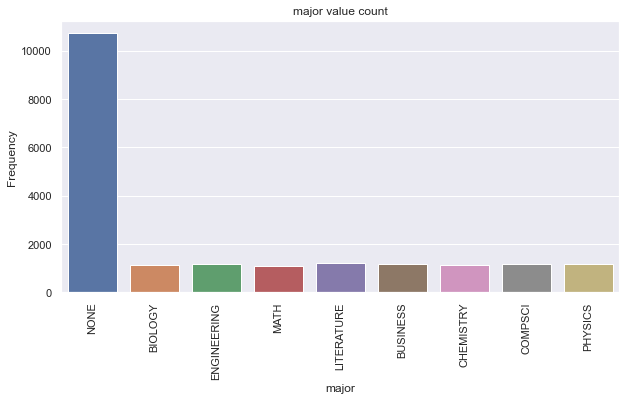

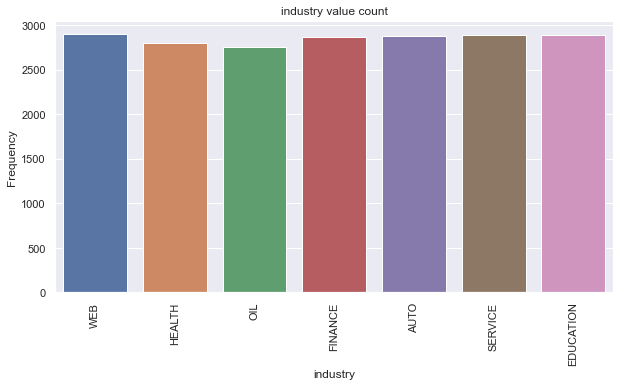

In [10]:
# categorical value counts 
for feature in cat_var: 
    data=df.copy()
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature)
    plt.title(feature+' value count') 
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    plt.show()

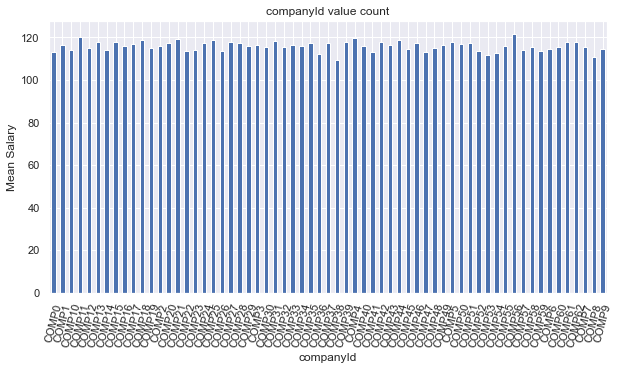

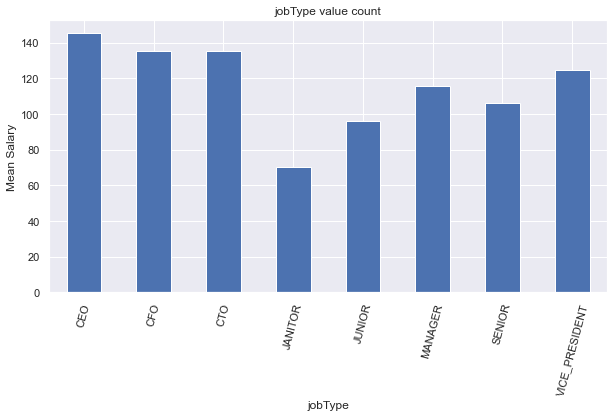

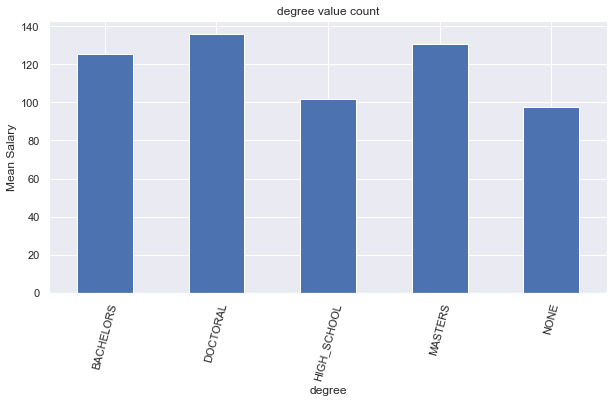

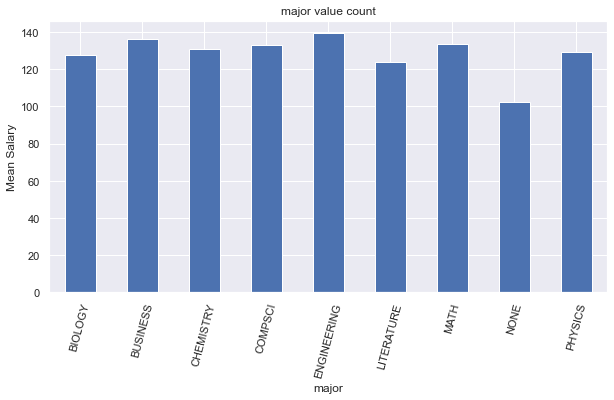

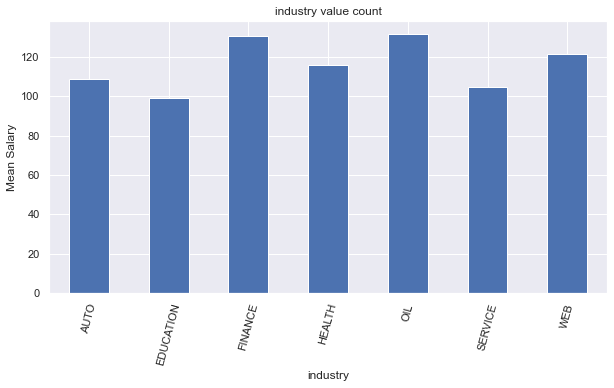

In [11]:
# mean salary for every categorical feature 
for feature in cat_var: 
    data=df.copy()
    plt.figure(figsize=(10, 5))
    data.groupby(feature)['salary'].mean().plot.bar()
    plt.title(feature+' value count') 
    plt.xticks(rotation = 75)
    plt.ylabel('Mean Salary')
    plt.show()

### Numerical Variable 

In [12]:
### Numerical Variable 
num_var = [feature for feature in df.columns if df[feature].dtypes =='int64' and feature != 'salary']
num_var

['yearsExperience', 'milesFromMetropolis']

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


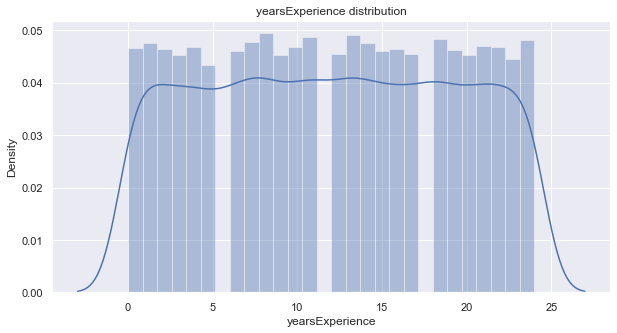

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


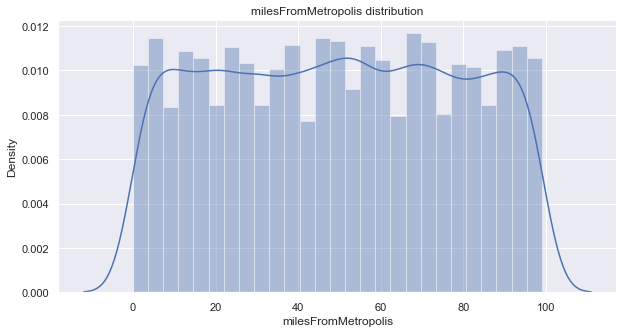

In [13]:
## histogram distribution 
for feature in num_var: 
    data=df.copy() 
    plt.figure(figsize=(10, 5))
    sns.distplot(data[feature])
    plt.title(feature+' distribution') 
    plt.show()

- The yearsExperience and milesFromMetropolis feature follow a uniform distribution.

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


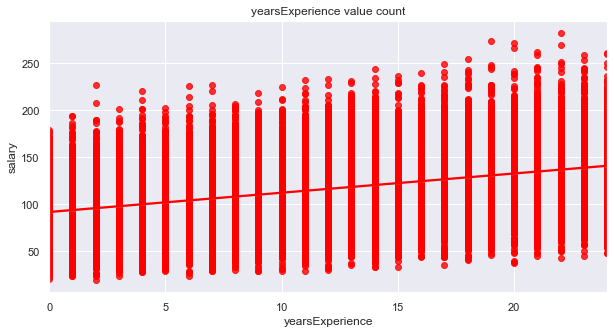

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


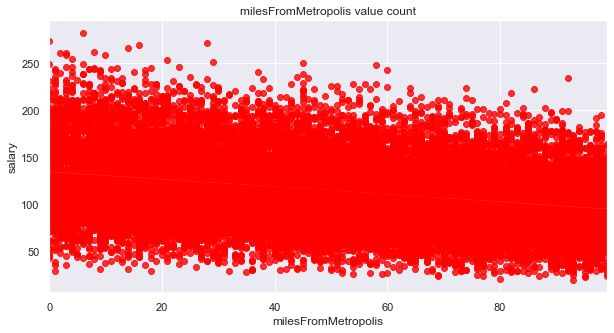

In [14]:
# numerical variable relationship with the target variable 
for feature in num_var: 
    data=df.copy()
    plt.figure(figsize=(10, 5))
    sns.regplot(data[feature], data['salary'], color='red')
    plt.title(feature+' value count')
    plt.show()

## Feature Engineering

In [15]:
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
987231,COMP41,CFO,HIGH_SCHOOL,NONE,WEB,12,21,174
79954,COMP44,JANITOR,HIGH_SCHOOL,NONE,HEALTH,15,64,58
567130,COMP44,CTO,HIGH_SCHOOL,NONE,OIL,21,4,168
500891,COMP9,CTO,HIGH_SCHOOL,NONE,FINANCE,5,89,85
55399,COMP3,JUNIOR,DOCTORAL,BIOLOGY,WEB,23,64,145


In [16]:
# extract the number at the end of the companyid values 
# replace companyid with the ID number at the end of the comapnyId
df['companyId'] = df.companyId.str.rsplit('P').str[1]

In [17]:
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
987231,41,CFO,HIGH_SCHOOL,NONE,WEB,12,21,174
79954,44,JANITOR,HIGH_SCHOOL,NONE,HEALTH,15,64,58
567130,44,CTO,HIGH_SCHOOL,NONE,OIL,21,4,168
500891,9,CTO,HIGH_SCHOOL,NONE,FINANCE,5,89,85
55399,3,JUNIOR,DOCTORAL,BIOLOGY,WEB,23,64,145


In [18]:
# map the categorical values with the value counts 
for feature in ['jobType', 'degree', 'major', 'industry']: 
    map_dict = df[feature].value_counts().to_dict()
    df[feature] = df[feature].map(map_dict)

In [19]:
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
987231,41,2507,4789,10715,2907,12,21,174
79954,44,2518,4789,10715,2805,15,64,58
567130,44,2551,4789,10715,2751,21,4,168
500891,9,2551,4789,10715,2864,5,89,85
55399,3,2449,3503,1126,2907,23,64,145


### Split the dataset 

In [20]:
# dependent and independent variable 
X = df.drop('salary', axis=1)
y = df['salary']

In [21]:
# trasin test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [22]:
print('X_train shape: ', X_train.shape)
print('X_train shape: ', X_test.shape)
print('X_train shape: ', y_train.shape)
print('X_train shape: ', y_test.shape)

X_train shape:  (16000, 7)
X_train shape:  (4000, 7)
X_train shape:  (16000,)
X_train shape:  (4000,)


### Feature Scaling -  Standardisation

In [23]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler 

sts = StandardScaler() 

X_train_s = sts.fit_transform(X_train)
X_test_s = sts.transform(X_test)

### Modelling: Decision Tree Regression 

In [24]:
# import DecisionTreeRegression 
from sklearn.tree import DecisionTreeRegressor

# instantiate 
dt_base_model = DecisionTreeRegressor() 

# fit and train
dt_base_model.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [25]:
X_train_s

array([[-1.49504347,  1.10773297,  1.01750242, ..., -2.02043307,
         0.83613894, -0.50059646],
       [-0.77554416, -1.15598965, -0.99268122, ...,  0.10945604,
         1.6706957 , -0.4657828 ],
       [-1.49504347, -1.35572988, -0.92869245, ...,  0.10945604,
         0.69704615,  0.64825424],
       ...,
       [ 1.71503038, -1.35572988,  1.01750242, ...,  0.10945604,
        -1.66753134, -0.39615549],
       [-0.83089026,  0.37535212,  1.07836978, ..., -1.00260996,
         1.53160291, -0.36134183],
       [ 0.94018497,  1.6847603 , -0.99268122, ...,  0.67491332,
        -1.11116017, -0.74429206]])

In [26]:
dt_base_model.score(X_train_s, y_train)

0.999978280549002

In [27]:
dt_base_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
y_pred_base_model = dt_base_model.predict(X_test_s) 
y_pred_base_model

array([195.,  45., 145., ..., 119.,  99., 159.])

In [29]:
# Actual vs Predicted values
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_base_model}).head()

,Actual,Predicted
215775,112,195.0
940970,66,45.0
127087,121,145.0
32234,107,158.0
645600,40,43.0


In [30]:
# train accuracy score
dt_base_model.score(X_train_s, y_train)

0.999978280549002

In [31]:
# test accuracy score
dt_base_model.score(X_test_s, y_test)

0.41996974853107094

- The decisionTreeRegressor resulted in a high training score and a very low test score which means the base model overfitted. It did not generalise on the test data.

### Hyperparameter tuning in DecisonTreeRegressor with RandomizedSearchCV

In [32]:
# import GridSearchCv 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV 

# instatiate 
dt_reg = DecisionTreeRegressor()

In [33]:
# hyperparamters
criterion=['mse', "mae"] 
max_depth = np.arange(7, 15)
max_leaf_nodes = np.arange(12, 18) 
min_samples_split = np.arange(5, 14)

In [34]:
# kfold
fold =KFold(n_splits=5, shuffle=True, random_state=1)

In [35]:
# dictionary of paramters
param = dict(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)

In [36]:
# randomized tuning
rand = RandomizedSearchCV(dt_reg, param_distributions=param, n_iter = 40, cv=fold, n_jobs=-1, random_state=25)

In [37]:
rand

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=DecisionTreeRegressor(), n_iter=40, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13])},
                   random_state=25)

In [38]:
rand.fit(X_train_s, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=DecisionTreeRegressor(), n_iter=40, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13])},
                   random_state=25)

In [39]:
results = pd.DataFrame(rand.cv_results_).sort_values('rank_test_score')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.040395,0.004410,0.002105,2.077350e-04,13,9,mse,"{'min_samples_split': 13, 'max_depth': 9, 'cri...",0.634784,0.650112,0.636839,0.642664,0.631548,0.639189,0.006553,1
35,0.052400,0.007334,0.001801,4.001860e-04,12,9,mse,"{'min_samples_split': 12, 'max_depth': 9, 'cri...",0.634876,0.650104,0.634584,0.642444,0.629868,0.638375,0.007115,2
26,0.054596,0.005314,0.001601,4.899598e-04,13,10,mse,"{'min_samples_split': 13, 'max_depth': 10, 'cr...",0.630970,0.649813,0.624769,0.642965,0.638027,0.637309,0.008790,3
30,0.042401,0.004073,0.002001,6.324098e-04,10,9,mse,"{'min_samples_split': 10, 'max_depth': 9, 'cri...",0.632966,0.647195,0.634362,0.640946,0.630442,0.637182,0.006092,4
2,0.040801,0.002489,0.001401,4.901934e-04,8,9,mse,"{'min_samples_split': 8, 'max_depth': 9, 'crit...",0.631759,0.645954,0.632837,0.641880,0.629640,0.636414,0.006344,5
3,0.046002,0.003996,0.001400,4.898626e-04,12,10,mse,"{'min_samples_split': 12, 'max_depth': 10, 'cr...",0.628089,0.649247,0.619951,0.641928,0.636384,0.635120,0.010267,6
25,0.052196,0.009867,0.002001,6.325606e-04,7,9,mse,"{'min_samples_split': 7, 'max_depth': 9, 'crit...",0.630611,0.645007,0.632449,0.637297,0.629061,0.634885,0.005769,7
38,0.047196,0.004020,0.001801,7.484685e-04,11,10,mse,"{'min_samples_split': 11, 'max_depth': 10, 'cr...",0.627389,0.645751,0.617698,0.640407,0.634939,0.633237,0.009865,8
5,0.046200,0.004957,0.001601,4.900767e-04,6,10,mse,"{'min_samples_split': 6, 'max_depth': 10, 'cri...",0.622979,0.636316,0.606449,0.632994,0.626698,0.625087,0.010421,9
39,0.045601,0.003718,0.002401,4.900378e-04,5,10,mse,"{'min_samples_split': 5, 'max_depth': 10, 'cri...",0.622530,0.635876,0.603903,0.630684,0.627210,0.624041,0.010973,10


In [40]:
rand.best_params_

{'min_samples_split': 13, 'max_depth': 9, 'criterion': 'mse'}

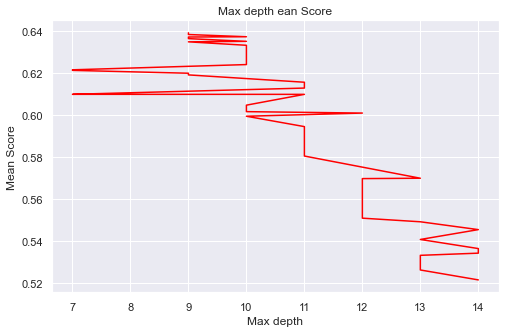

In [41]:
# max depth graph 
plt.figure(figsize =(8, 5))
plt.plot(results['param_max_depth'], results['mean_test_score'],color='red')
plt.title('Max depth ean Score')
plt.ylabel('Mean Score') 
plt.xlabel('Max depth')
plt.show()

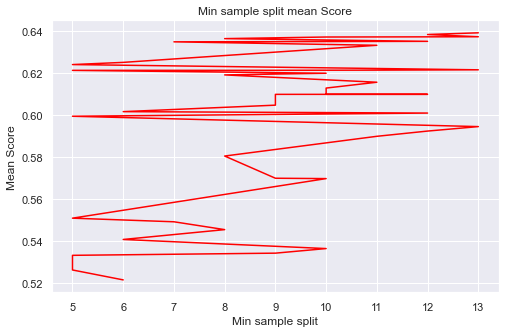

In [42]:
# min sample split graph 
plt.figure(figsize =(8, 5))
plt.plot(results['param_min_samples_split'], results['mean_test_score'],color='red')
plt.title('Min sample split mean Score')
plt.ylabel('Mean Score') 
plt.xlabel('Min sample split')
plt.show()

In [43]:
y_pred_rand = rand.predict(X_test_s)
y_pred_rand

array([121.3908046 ,  49.21212121, 124.5308642 , ..., 114.41525424,
        83.93333333, 145.48387097])

In [44]:
rand.score(X_test_s, y_test)

0.6573600051861581

### Modeling with the Optimal Hyperparameters

In [45]:
# modelling
dtr = DecisionTreeRegressor(criterion = 'mse', max_depth= 8, min_samples_split= 10) 

# fit
dtr.fit(X_train_s, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10)

In [46]:
dtr.score(X_train_s, y_train)

0.6929978914164545

In [47]:
dtr.score(X_test_s, y_test)

0.6533267868102401

[Text(414.73933744635195, 513.4, 'degree <= 0.044\nmse = 1504.987\nsamples = 16000\nvalue = 116.036'),
 Text(205.32094957081546, 453.0, 'yearsExperience <= -0.346\nmse = 1254.237\nsamples = 8378\nvalue = 130.82'),
 Text(94.52172746781116, 392.6, 'jobType <= -1.256\nmse = 906.946\nsamples = 3318\nvalue = 115.323'),
 Text(45.352467811158796, 332.2, 'milesFromMetropolis <= 0.178\nmse = 817.122\nsamples = 504\nvalue = 137.28'),
 Text(24.696888412017167, 271.8, 'industry <= 0.298\nmse = 790.392\nsamples = 287\nvalue = 145.93'),
 Text(13.471030042918455, 211.39999999999998, 'yearsExperience <= -1.181\nmse = 726.4\nsamples = 125\nvalue = 156.2'),
 Text(7.184549356223176, 151.0, 'industry <= -1.512\nmse = 526.489\nsamples = 39\nvalue = 145.846'),
 Text(3.592274678111588, 90.59999999999997, 'major <= -1.073\nmse = 232.769\nsamples = 13\nvalue = 161.0'),
 Text(1.796137339055794, 30.199999999999932, 'mse = 114.531\nsamples = 7\nvalue = 170.571'),
 Text(5.388412017167382, 30.199999999999932, 'mse 

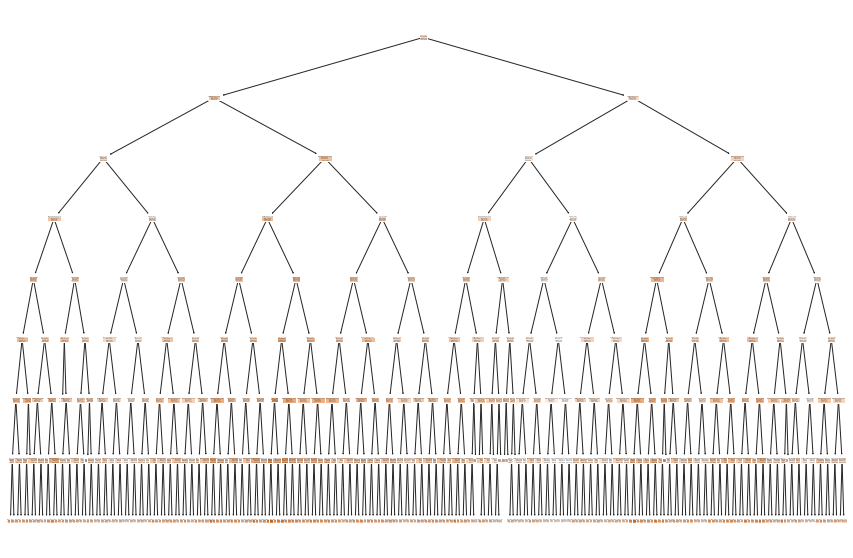

In [48]:
# plot decision tree 
from sklearn.tree import plot_tree 

plt.figure(figsize=(15, 10))
plot_tree(dtr, feature_names = X_train.columns, filled=True)

### Modelling - Random Forest Regressor

In [49]:
# import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor 

# instantiate 
rfr_base_model = RandomForestRegressor()

# fit 
rfr_base_model.fit(X_train_s, y_train)

RandomForestRegressor()

In [50]:
y_pred_rfr = rfr_base_model.predict(X_test_s) 
y_pred_rfr

array([118.83,  52.98, 127.12, ..., 121.15,  88.42, 149.67])

In [51]:
# Actual vs Predicted values
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rfr}).head()

,Actual,Predicted
215775,112,118.83
940970,66,52.98
127087,121,127.12
32234,107,128.63
645600,40,41.49


In [52]:
rfr_base_model.score(X_train_s, y_train)

0.9587991192534657

In [53]:
rfr_base_model.score(X_test_s, y_test)

0.7141134552333028

- The RandomForestRegressor model resulted in a high training score and a considerable low score for the  test data, which means the base model overfitted. It did not generalise on the test data.

### Hyperparameter tuning in RandomForestRegressor with RandomizedSearchCV

In [54]:
# parameters
n_estimators = [100, 200, 300, 500, 1000]
max_features = np.arange(1, 4) 
max_depth = np.arange(4, 7) 

In [55]:
n_estimators

[100, 200, 300, 500, 1000]

In [56]:
# cross validation 
rf_fold = KFold(n_splits=6, shuffle=True, random_state=5)

In [57]:
# dictionary of parameters
parameters = dict(n_estimators=n_estimators, max_features=max_features)

In [58]:
# instatiate model 
rf_reg = RandomForestRegressor()

In [59]:
rf_rand =RandomizedSearchCV(rf_reg, parameters, n_iter=10, cv=rf_fold, 
                            random_state=25, n_jobs = -1)
rf_rand

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=5, shuffle=True),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_features': array([1, 2, 3]),
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=25)

### Modelling RandomForestRegressore with optimal Hyperparameter tuning

In [60]:
rf_rand.fit(X_train_s, y_train)

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=5, shuffle=True),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_features': array([1, 2, 3]),
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=25)

In [61]:
pd.DataFrame(rf_rand.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,20.479789,2.389758,0.784804,0.071323,500,3,"{'n_estimators': 500, 'max_features': 3}",0.706975,0.713062,0.713250,0.711203,0.715858,0.719309,0.713276,0.003810,2
1,10.729142,0.193446,0.434654,0.028974,300,3,"{'n_estimators': 300, 'max_features': 3}",0.705275,0.713079,0.712895,0.710495,0.715225,0.717695,0.712444,0.003897,4
2,2.268433,0.042117,0.146505,0.005793,100,1,"{'n_estimators': 100, 'max_features': 1}",0.668478,0.675091,0.684342,0.668560,0.673774,0.676489,0.674456,0.005373,10
3,11.531106,0.073173,0.713185,0.004702,500,1,"{'n_estimators': 500, 'max_features': 1}",0.671980,0.679257,0.684409,0.672327,0.681675,0.680077,0.678288,0.004626,8
4,6.999086,0.156781,0.285680,0.014563,200,3,"{'n_estimators': 200, 'max_features': 3}",0.705748,0.713026,0.713841,0.711943,0.715732,0.717239,0.712921,0.003647,3
5,31.447102,1.691088,1.842954,0.627214,1000,2,"{'n_estimators': 1000, 'max_features': 2}",0.701460,0.705265,0.711743,0.703728,0.707283,0.711685,0.706861,0.003848,5
6,2.890084,0.029252,0.147158,0.006668,100,2,"{'n_estimators': 100, 'max_features': 2}",0.696848,0.704516,0.707080,0.703425,0.705928,0.706074,0.703978,0.003397,7
7,4.724717,0.015480,0.298649,0.033278,200,1,"{'n_estimators': 200, 'max_features': 1}",0.670880,0.674488,0.685761,0.669732,0.674895,0.677496,0.675542,0.005248,9
8,38.726046,4.417447,1.696602,0.227591,1000,3,"{'n_estimators': 1000, 'max_features': 3}",0.707827,0.714111,0.714533,0.712258,0.715703,0.718441,0.713812,0.003262,1
9,18.646334,4.655385,0.906521,0.215706,500,2,"{'n_estimators': 500, 'max_features': 2}",0.700822,0.705383,0.710428,0.703382,0.705391,0.709558,0.705828,0.003329,6


In [62]:
rf_rand.best_params_

{'n_estimators': 1000, 'max_features': 3}

In [63]:
y_pred_rand = rf_rand.predict(X_test_s)
y_pred_rand

array([122.608,  53.415, 128.75 , ..., 113.42 ,  89.193, 150.369])

In [64]:
# Actual vs Predicted values
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rand}).head()

,Actual,Predicted
215775,112,122.608
940970,66,53.415
127087,121,128.750
32234,107,130.648
645600,40,41.122


In [65]:
rf_rand.score(X_train_s, y_train)

0.9615958382354599

In [66]:
rf_rand.score(X_test_s, y_test)

0.7230225780329584

- There is a low bias with the training data, and a high variance with the test data. Though there is an increase in the generalisation to the test data, but there is still a level of overfitting in the model

### Modelling: AdaBoost Regressor

In [89]:
# import AdaBoost Regressor 
from sklearn.ensemble import AdaBoostRegressor 

# instatiate 
ab_reg = AdaBoostRegressor()

# fit 
ab_reg.fit(X_train_s, y_train)

# predict 
y_pred_ab_reg = ab_reg.predict(X_test_s)

In [90]:
# train score
ab_reg.score(X_train_s, y_train)

0.5454700877650944

In [91]:
# test score
ab_reg.score(X_test_s, y_test)

0.5369136861219888

In [92]:
# import module
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
# metrics
mae = mean_absolute_error(y_test, y_pred_ab_reg) 
mse = mean_squared_error(y_test, y_pred_ab_reg) 
rmse = np.sqrt(mse)

In [94]:
print(f'Mean absolute error: {mae: 2f}')
print(f'Mean squared error: {mse: 2f}')
print(f'Root Mean squared error: {rmse: 2f}')

Mean absolute error:  21.936924
Mean squared error:  686.343351
Root Mean squared error:  26.198155


### Modelling: GradientBoostingRegresssor

In [73]:
# import GradientBoosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor 

# instatiate 
gbr_reg_base = GradientBoostingRegressor()

# fit 
gbr_reg_base.fit(X_train_s, y_train)

# predict 
y_pred_gbc = gbr_reg_base.predict(X_test_s)

In [74]:
# train score
gbr_reg_base.score(X_train_s, y_train)

0.7488435396681881

In [75]:
# test score
gbr_reg_base.score(X_test_s, y_test)

0.74572224483455

In [77]:
paramters = {'n_estimators': [100, 200, 300, 400]}

In [79]:
from sklearn.model_selection import GridSearchCV 

grid_gbc = GridSearchCV(gbr_reg_base, param_grid=parameters, n_jobs=-1, cv=6, )

grid_gbc.fit(X_train_s, y_train)

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_features': array([1, 2, 3]),
                         'n_estimators': [100, 200, 300, 500, 1000]})

In [85]:
pd.DataFrame(grid_gbc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.785453,0.212651,0.017999,0.004163,1,100,"{'max_features': 1, 'n_estimators': 100}",0.642927,0.645321,0.641187,0.651911,0.654838,0.643756,0.646657,0.004976,15
1,0.877280,0.076338,0.020499,0.002986,1,200,"{'max_features': 1, 'n_estimators': 200}",0.718832,0.701185,0.693074,0.707899,0.719843,0.704495,0.707555,0.009469,14
2,1.242092,0.049519,0.027999,0.003000,1,300,"{'max_features': 1, 'n_estimators': 300}",0.732957,0.733922,0.719033,0.725652,0.729193,0.728933,0.728282,0.004956,12
3,2.060543,0.026061,0.049497,0.014659,1,500,"{'max_features': 1, 'n_estimators': 500}",0.746177,0.748288,0.728885,0.742409,0.744100,0.743419,0.742213,0.006262,10
4,5.690714,1.070400,0.171490,0.101007,1,1000,"{'max_features': 1, 'n_estimators': 1000}",0.748855,0.751689,0.733971,0.744481,0.748926,0.750259,0.746364,0.005964,7
5,0.716957,0.064528,0.014666,0.004749,2,100,"{'max_features': 2, 'n_estimators': 100}",0.707765,0.721914,0.692472,0.715923,0.709069,0.715599,0.710457,0.009311,13
6,1.563239,0.219165,0.031332,0.018453,2,200,"{'max_features': 2, 'n_estimators': 200}",0.751295,0.748085,0.731257,0.739382,0.744678,0.741098,0.742632,0.006471,9
7,2.012380,0.128820,0.036331,0.014636,2,300,"{'max_features': 2, 'n_estimators': 300}",0.751534,0.752863,0.737241,0.745935,0.750175,0.748272,0.747670,0.005169,5
8,4.391238,1.166119,0.054391,0.012875,2,500,"{'max_features': 2, 'n_estimators': 500}",0.755228,0.756582,0.736162,0.746945,0.752362,0.750168,0.749574,0.006782,1
9,7.367225,0.891954,0.105827,0.026747,2,1000,"{'max_features': 2, 'n_estimators': 1000}",0.750479,0.753758,0.733699,0.745936,0.747089,0.749240,0.746700,0.006328,6


In [95]:
grid_gbc.best_params_

{'max_features': 2, 'n_estimators': 500}

In [96]:
grid_gbc.best_score_

0.7495743953797797

In [82]:
# predict
y_pred_gbc_base = grid_gbc.predict(X_test_s)

In [84]:
# train
grid_gbc.score(X_train_s, y_train)

0.7708730691540142

In [86]:
# test score
grid_gbc.score(X_test_s, y_test)

0.7561749742347721

In [80]:
# import module
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
# metrics
mae = mean_absolute_error(y_test, y_pred_gbc_base) 
mse = mean_squared_error(y_test, y_pred_gbc_base) 
rmse = np.sqrt(mse)

In [88]:
print(f'Mean absolute error: {mae: 2f}')
print(f'Mean squared error: {mse: 2f}')
print(f'Root Mean squared error: {rmse: 2f}')

Mean absolute error:  15.374580
Mean squared error:  361.374716
Root Mean squared error:  19.009858
